In [9]:
import sys
import os

modul_path = os.path.join(os.path.dirname(os.getcwd()), "src" )
sys.path.append(modul_path)

from data_processing import csv_reader, get_values, mean

data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "Precipitation_data.csv")

rain_data = csv_reader(data_path, 'sum(precipitation_amount P1D)')
values = get_values(rain_data, '2015-01-01', '2015-01-03')
mean = mean(rain_data)
print(mean)



5.2695866411168915


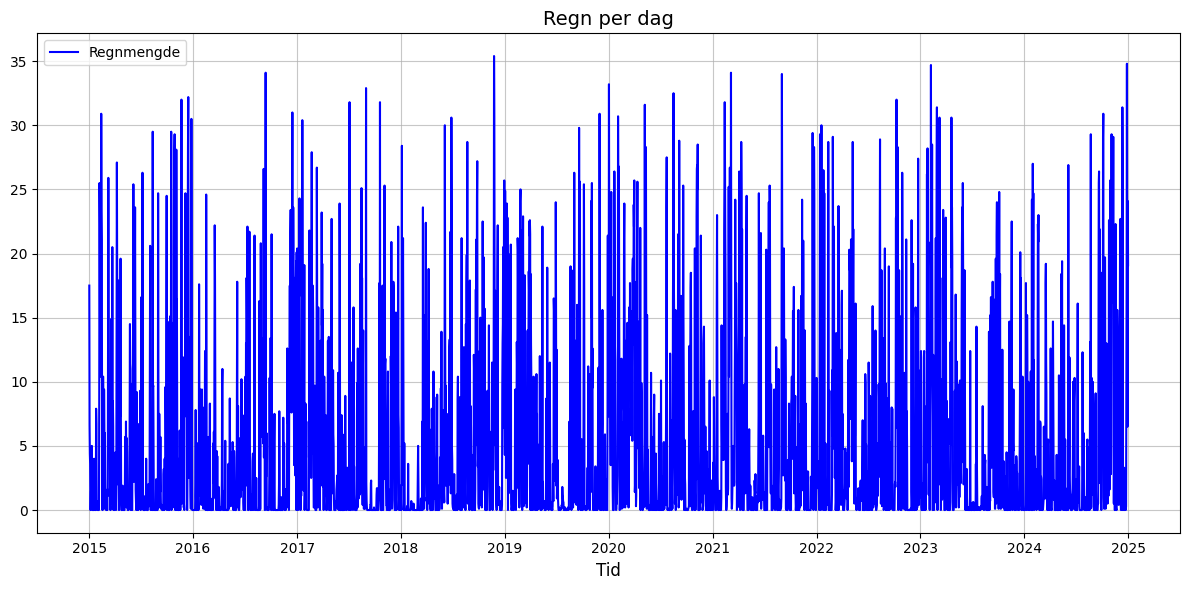

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

def plot_rain(data):
    """
    Plotting data over time.
    
    Args:
    df (pd.DataFrame): DataFrame med kolonnene ['referenceTimestamp', 'datatype', 'value', 'unit', 'station']
    """

    # Ekstraher tidspunkter, verdier og enhet
    times = data['referenceTimestamp']
    values = data['value']
    y_axis_label = None

    

    # Opprett figur
    plt.figure(figsize=(12, 6))
    plt.plot(times, values, color="b", linestyle='-', marker='', label="Regnmengde")

    plt.xlabel("Tid", fontsize=12)
    plt.ylabel(y_axis_label, fontsize=12)
    plt.title("Regn per dag", fontsize=14)

    # **Velg smarte x-ticks for å unngå overfylte datoer**
    num_ticks = 10  # Antall x-ticks vi ønsker
    tick_indices = np.linspace(0, len(times) - 1, num_ticks, dtype=int)  # Velg likefordelte punkter
    tick_labels = [times[i].strftime('%Y-%m') for i in tick_indices]  # Vis kun år og måned

    plt.grid(True, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_rain(rain_data)
